In [1]:
# import python libraries into the environment
import numpy as np          # The 'as' keyword assigns an alias to the
                            # library for convenience
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# This jupyter directive allows jupyter to display a matplotlib map without the need of explicitly calling the map
%matplotlib inline

## Loading datasets

In [2]:
# Now, let's define/import a dataframe to use in the guide
# Case 1: define a custom dataframe
heights = pd.DataFrame({'Age': range(5, 20),
                            'BoyHeight': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5],
                            'GirlHeight': [109.6, 115, 121, 126.5, 132.5, 139, 145, 151, 156, 160, 161.7, 162.5, 162.8, 163, 163.2]}
                        )

# Case 2: load a dataset from an csv
csv_dataframe = pd.read_csv('./Data/cereal.csv', delimiter=',')

# Case 3: load a dataset from the sklearn library
iris_raw_data = datasets.load_iris()
iris_dataframe = pd.DataFrame(data=iris_raw_data['data'], columns=iris_raw_data['feature_names'])

Now that we've loaded our datasets, let's do some data exploration.
There are many things that can give us hints on what our data is composed of, i.e.,
we can look at the shape of our dataset, or the datatypes, for example:

In [3]:

print("The shape of iris_dataframe is:", iris_dataframe.shape)
print("The datateypes in iris_dataframe are:", iris_dataframe.dtypes)
# Note that .shape and .dtypes are properties, hence, they are just references, NOT called [i.e, using ()]

The shape of iris_dataframe is: (150, 4)
The datateypes in iris_dataframe are: sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


We can look at a preview of our data in a dataframe using the `.head()` or `.tail()` methods.
The difference is that `.head()` looks at the beginning of the dataframe, whereas `.tail()` looks
at the end.

In [4]:

iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Note that we can also extract a subset from the beginning or the end of the dataframe
# using the previously mentioned methods, for example:
iris_dataframe_head = iris_dataframe.head(3)
iris_dataframe_head

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


One key aspect of manipulating data with Pandas is the ability to reference rows and columns
in a dataframe. To do this, we either index the dataframe by a column name or by using the
`iloc` property in conjunction with a row and a column to index the dataframe.

In [ ]:
# Index one column of the dataframe
print(iris_dataframe["sepal length (cm)"])
    # Note that if we use this method, we cannot refer to a column by index number
    # i.e., print(iris_dataframe[0])


# This type of indexing, however, can be used for several columns. To do this, we pass a list with
# the column names that we want the dataframe to return
print(iris_dataframe[["sepal length (cm)", "sepal width (cm)"]])
    # DO NOT FORGET to put the column names inside there own list.
    # The notation might be confusing, so keep an open eye for that.


# To reference a column by index number, we must use the dataframe .iloc[row, col] property, where row and col are valid indices for the dataframe.
print(iris_dataframe.iloc[:, 0])
    # Note that pandas uses python indexing, so if we want to specify a rowspace or columnspace, we         # must use the splicing notation, i.e., [0:10, 0] will refer to the rows with index 0...10 in the       # column with index 0

In [8]:
# Practice getting the 3rd row from the 2nd column in iris_dataframe using the notation specified above


# INSERT CODE HERE



Another way we can do data analysis on a dataframe is by looking at the distribution of the values.
There are several ways we can do this, namely, we can look at a histogram or a bar chart; however,
these will represent these will represent the same thing

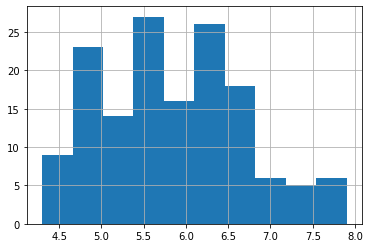

In [9]:
# For the histogram, first we extract one columns for which we want to look at the distribution and then
# we call the .hist() method to display the distribution of the values
iris_dataframe["sepal length (cm)"].hist()

Similarly, we can use a bar plot to represent the distribution, although bear in mind that
using a bar plot requires extra work, that is, we must compute the value count beforehand
using the `.value_counts()` method. After that, we must call the `.plot()` method, which is
the dataframe's way of communicating with matplotlib, and finally `.bar()` to display the bar chart.

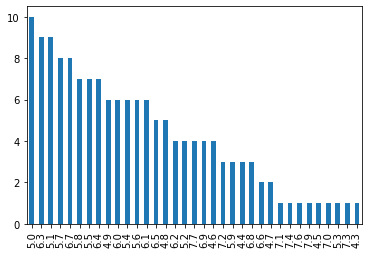

In [10]:
iris_dataframe["sepal length (cm)"].value_counts().plot.bar()
    # Note: plotting a histogram is usually much easier and cleaner

## Missing values

Sometimes our dataset might contain missing values, in order to see how many missing (NaN \[Not a Number\])
values we have, we must use the pandas dataframe's `.isna()` method. This will return a numpy array
of boolean values which indicate whether a value is missing or not. After we have our missing values array
we can proceed to calculate the number of missing values by taking its sum using the `.sum()` method.

In [12]:
iris_dataframe.isna().sum()
# Note that in this case there are no missing values in iris_dataframe, hence the 0 as the result.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Change a column's datatype

Sometimes a column's datatype does not fit the data or our needs. Nonetheless, the Pandas library provides
us with the `.astype()` method for dataframe, which lets specify our desired data type for a column,
for exmaple:

In [14]:
print(iris_dataframe["sepal length (cm)"])
iris_dataframe["sepal length (cm)"] = iris_dataframe["sepal length (cm)"].astype(int)
    # Note that in this case, we changed the datatype to int (Integer), so we are loosing 
    # information from the column (the decimal part).
print(iris_dataframe["sepal length (cm)"])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64
0      5
1      4
2      4
3      4
4      5
      ..
145    6
146    6
147    6
148    6
149    5
Name: sepal length (cm), Length: 150, dtype: int32


## Dataframe filters

Pandas dataframe filters are a powerfull tool that lets us extract data from a dataframe. They work by
specifying a condition which propagates to a specified column or set of columns, for example:

In [15]:
greater_than_5_sepal_length_filter = (iris_dataframe["sepal length (cm)"] > 5)

# This filter will result in a numpy array whose values are true whenever the condition is met
# for instance:
print(greater_than_5_sepal_length_filter)

# Now that we have our filter, we can apply such filter to our dataframe in order to extract our
# our desired data. We do this by passing our filter as an index in our dataframe, i.e.,
greater_than_5_sepal_length_rows_in_iris = iris_dataframe[greater_than_5_sepal_length_filter]

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Name: sepal length (cm), Length: 150, dtype: bool


## Adding a column to a DataFrame

Adding a column to a dataframe is virtually the same to assigning a value to a variable. First we specify the desired column name for our new column and then we assign the value to such column, for exmaple:

In [1]:
iris_dataframe["target"] = iris_raw_data["target"]
iris_dataframe.head()
# We have now succesffully added the target variable to our dataframe

NameError: name 'iris_raw_data' is not defined

## Matplotlib and basic plotting

As you know, matplotlib is a python library that allows us to plot charts inside the python environment.
Before we start plotting some beautiful charts, lets extract some data from our iris dataframe to
simplify our task.

In [17]:

iris_versicolor = iris_dataframe[iris_dataframe['target'] == 1]
    # Note: the condition above is equivalent to defining a filter beforehand and applying it
    # to the dataframe. Choose whatever form you like.

Now that we have our data, lets plot some charts! First, we will start with a box plot (sometimes
called a candle plot!). To do this, we call Pandas `.plot()` method \[remember that this method allows
Pandas to talk to matplotlib\]. After we do this, we will call the `box()` method to plot the box chart.

9

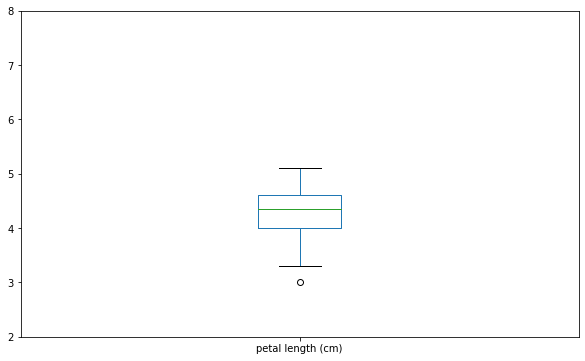

In [18]:
iris_versicolor['petal length (cm)'].plot.box(figsize=(10, 6))
plt.ylim([2, 8])
9
# Note: figsize(width, height) allows us to specify the width and height of the chart
# On the other hand, the plt.ylim() method lets us define the y-axis top and bottom limits.

## Line graphs

Everyone likes line graphs; they are easy to read and cut straight to the chase. Plotting a line graph
using matplotlib is as simple as reading one. The only thing you need for a line graph is the data
corresponding to the x and y coordinates, and matplotlib handles the rest; however, if you want to
get fancy with your plots, there are some tricks that will let you customize your graph to your
heart's content.

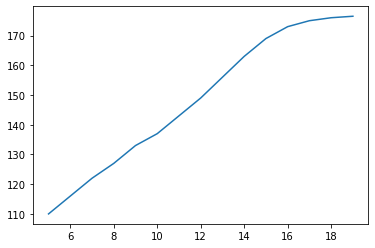

In [20]:
# First, we will start by plotting boys's Age vs Height
plt.plot(heights['Age'], heights['BoyHeight'])

Text(0, 0.5, 'Height (cm)')

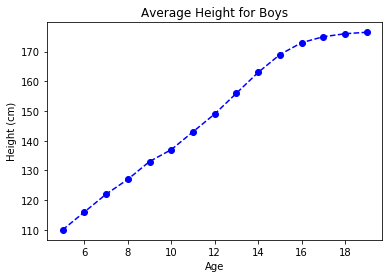

In [21]:
# However, this plot is too plain and boring. Let customize it a little further :)
plt.plot(heights['Age'], heights['BoyHeight'], 'bo--')


# On top of passing the x and y data to the method, we use the 'bo--' argument to define the shape of
# the graph's line. The 'b' tells matplotlib the the line should be blue, the 'o' marks the ages of the
# boys in the dataset, and '--' defined the shape of line graph (intermittent dashes).
plt.title("Average Height for Boys") # Defines a title for this graph
plt.xlabel("Age") # Defines a label for your data corresponding to the x-axis
plt.ylabel("Height (cm)") # Defines a label for your data corresponding to the y-axis

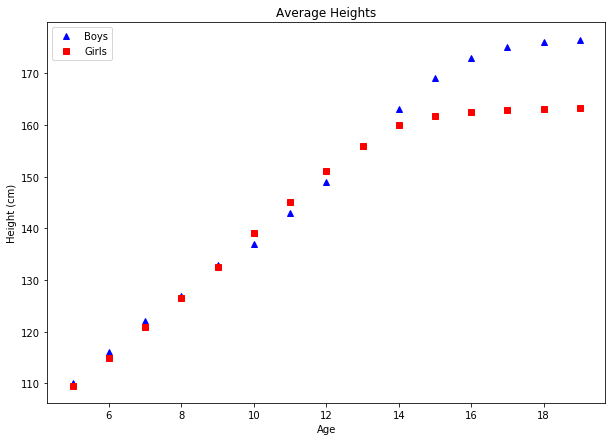

In [22]:
# But wait, there's more!! You can plot several datapoints into a single graph : 
plt.figure(figsize=(10, 7))
plt.plot(heights['Age'], heights['BoyHeight'], 'b^', label="Boys") # The 's' in 'rs' stands for triangles
plt.plot(heights['Age'], heights['GirlHeight'], 'rs', label='Girls') # The 's' in 'rs' stands for squares
plt.title("Average Heights")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.legend()
# Note: plt.legend() provides a legend to your plot, which is a visual cue for what is being plotted
# in the chart.

This is a lot to digest, but this material will sink in as you practice. For a more precise defintion
of each of the methods mentioned in this guide, please look up the documentation in each library’s
respective site. This can be done with a quick google search.